### import the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### reading the CSV

In [2]:
data = pd.read_csv("csv-1 2.csv")
data.columns

Index(['index', 'Year', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4',
       'Category', 'Topic', 'Indicator', 'Data_Value_Type', 'Data_Value_Unit',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'Break_Out_Category', 'Break_Out', 'CategoryId', 'TopicId',
       'IndicatorID', 'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId',
       'LocationID', 'GeoLocation'],
      dtype='object')

### cleaning the data 

In [3]:
data=data.drop(['GeoLocation',"Data_Value","Data_Value_Footnote_Symbol","Data_Value_Footnote","LowConfidenceLimit","HighConfidenceLimit"], axis=1)
data = data.dropna()
print(data.isnull().sum())

index                 0
Year                  0
LocationAbbr          0
LocationDesc          0
DataSource            0
PriorityArea1         0
PriorityArea2         0
PriorityArea3         0
PriorityArea4         0
Category              0
Topic                 0
Indicator             0
Data_Value_Type       0
Data_Value_Unit       0
Data_Value_Alt        0
Break_Out_Category    0
Break_Out             0
CategoryId            0
TopicId               0
IndicatorID           0
Data_Value_TypeID     0
BreakOutCategoryId    0
BreakOutId            0
LocationID            0
dtype: int64


In [4]:
data.head()

,index,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,...,Data_Value_Alt,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
0,0,2009,MDW,Midwest,NHIS,None,ABCS,None,None,Risk Factors,...,25.9,Gender,Male,C2,T15,NS010,AgeStdz,BOC02,GEN01,9002
1,1,2009,SOU,South,NHIS,None,None,Healthy People 2020,None,Risk Factors,...,37.6,Race,Non-Hispanic Black,C2,T14,NS011,Crude,BOC04,RAC02,9003
2,2,2009,MDW,Midwest,NHIS,Million Hearts,None,None,None,Cardiovascular Diseases,...,2.6,Gender,Female,C1,T6,NS004,Crude,BOC02,GEN02,9002
3,3,2013,SOU,South,NHIS,None,None,None,None,Cardiovascular Diseases,...,9.0,Overall,Overall,C1,T1,NS001,Crude,BOC01,OVR01,9003
4,4,2010,MDW,Midwest,NHIS,None,ABCS,None,None,Risk Factors,...,23.4,Age,18-24,C2,T15,NS010,Crude,BOC03,AGE01,9002


# Linear Regression:

In [5]:
# Prepare the data
X = data['Year'].values.reshape(-1, 1)
y = data['Data_Value_Alt'].values.reshape(-1, 1)

# Split the data into training and testing sets
split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Predict values for the test set
y_pred = reg.predict(X_test)

# Evaluate the model
score = reg.score(X_test, y_test)
print('R-squared:', score)

R-squared: -0.013914975583367628


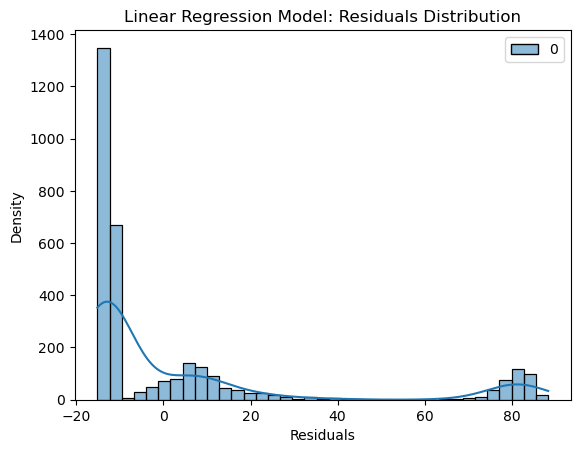

In [6]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a distribution plot of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Linear Regression Model: Residuals Distribution')
plt.show()

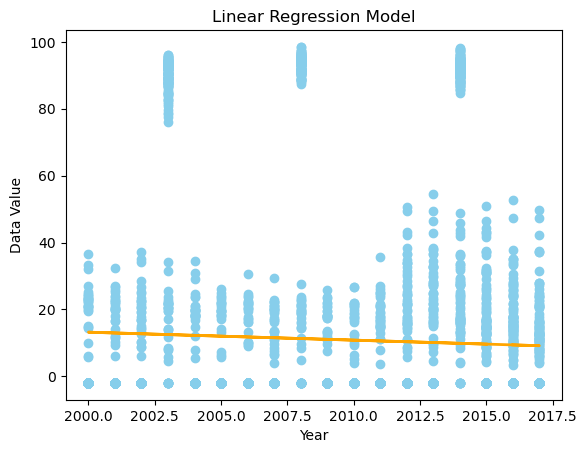

<AxesSubplot:>

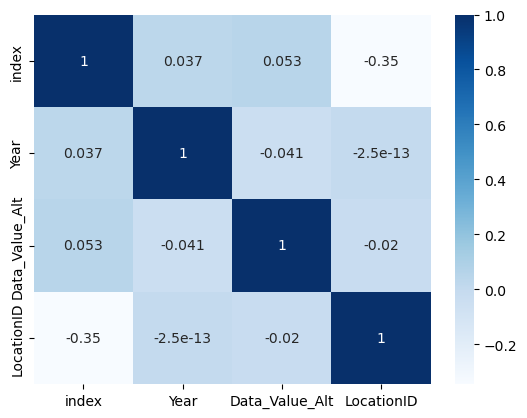

In [7]:
# Plot the data and the model predictions
plt.scatter(X_test, y_test, color='skyblue')
plt.plot(X_test, y_pred, color='Orange', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.show()

# Generate a heatmap of the correlations
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)


# Decision Tree Regression

In [8]:
# Prepare the data
X = data['Year']
y = data['Data_Value_Alt']

# Convert the categorical variable into numerical labels
le = LabelEncoder()
X = le.fit_transform(X)

# Split the data into training and testing sets
split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Train the model
reg = DecisionTreeRegressor().fit(X_train.reshape(-1, 1), y_train)

# Predict values for the test set
y_pred = reg.predict(X_test.reshape(-1, 1))

# Evaluate the model
score = reg.score(X_test.reshape(-1, 1), y_test)
print('R-squared:', score)

R-squared: 0.17736647709614184


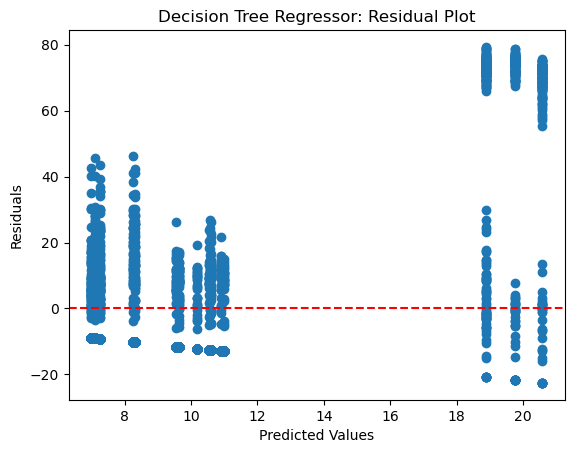

<AxesSubplot:>

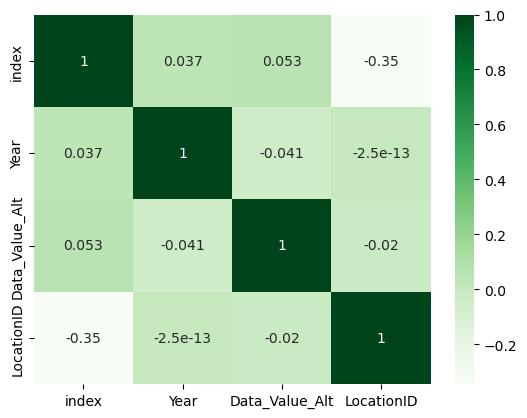

In [9]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Decision Tree Regressor: Residual Plot')
plt.show()

# Generate a heatmap of the correlations
corr = data.corr()
sns.heatmap(corr, cmap='Greens', annot=True)

# RandomForest Regressor

In [10]:
# Prepare the data
X = data[['Year', 'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic', 'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Break_Out_Category', 'Break_Out']]
y = data['Data_Value_Alt']

# Convert categorical variables into numerical labels
le = LabelEncoder()
X['PriorityArea1'] = le.fit_transform(X['PriorityArea1'])
X['PriorityArea2'] = le.fit_transform(X['PriorityArea2'])
X['PriorityArea3'] = le.fit_transform(X['PriorityArea3'])
X['PriorityArea4'] = le.fit_transform(X['PriorityArea4'])
X['Category'] = le.fit_transform(X['Category'])
X['Topic'] = le.fit_transform(X['Topic'])
X['Indicator'] = le.fit_transform(X['Indicator'])
X['Data_Value_Type'] = le.fit_transform(X['Data_Value_Type'])
X['Data_Value_Unit'] = le.fit_transform(X['Data_Value_Unit'])
X['Break_Out_Category'] = le.fit_transform(X['Break_Out_Category'])
X['Break_Out'] = le.fit_transform(X['Break_Out'])

# Split the data into training and testing sets
split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Train the model
reg = RandomForestRegressor().fit(X_train, y_train)

# Predict values for the test set
y_pred = reg.predict(X_test)




/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_5657/3569435079.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PriorityArea1'] = le.fit_transform(X['PriorityArea1'])
/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_5657/3569435079.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PriorityArea2'] = le.fit_transform(X['PriorityArea2'])
/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_5657/3569435079.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [11]:
# Evaluate the model
score = reg.score(X_test, y_test)
print('R-squared:', score)

R-squared: 0.9138594973796867


<AxesSubplot:>

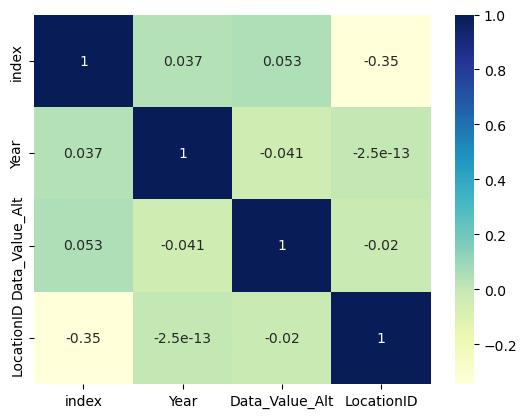

In [12]:
# Generate a heatmap of the correlations
corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True)

#  Support Vector Regression

In [13]:
# Prepare the data
X = data[['Year', 'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic', 'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Break_Out_Category', 'Break_Out']]
y = data['Data_Value_Alt']

# Convert categorical variables into numerical labels
le = LabelEncoder()
X['PriorityArea1'] = le.fit_transform(X['PriorityArea1'])
X['PriorityArea2'] = le.fit_transform(X['PriorityArea2'])
X['PriorityArea3'] = le.fit_transform(X['PriorityArea3'])
X['PriorityArea4'] = le.fit_transform(X['PriorityArea4'])
X['Category'] = le.fit_transform(X['Category'])
X['Topic'] = le.fit_transform(X['Topic'])
X['Indicator'] = le.fit_transform(X['Indicator'])
X['Data_Value_Type'] = le.fit_transform(X['Data_Value_Type'])
X['Data_Value_Unit'] = le.fit_transform(X['Data_Value_Unit'])
X['Break_Out_Category'] = le.fit_transform(X['Break_Out_Category'])
X['Break_Out'] = le.fit_transform(X['Break_Out'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
reg = SVR(kernel='rbf')
reg.fit(X_train, y_train)



/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_5657/942529910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PriorityArea1'] = le.fit_transform(X['PriorityArea1'])
/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_5657/942529910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PriorityArea2'] = le.fit_transform(X['PriorityArea2'])
/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_5657/942529910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

SVR()

R-squared: 0.10875087032383046


<AxesSubplot:>

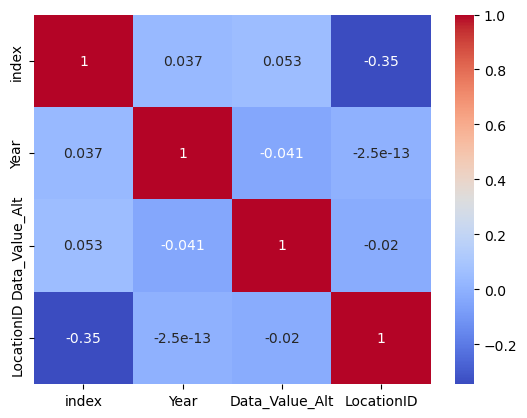

In [14]:
# Predict values for the test set
y_pred = reg.predict(X_test)

# Evaluate the model
score = reg.score(X_test, y_test)
print('R-squared:', score)

# Generate a heatmap of the correlations
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

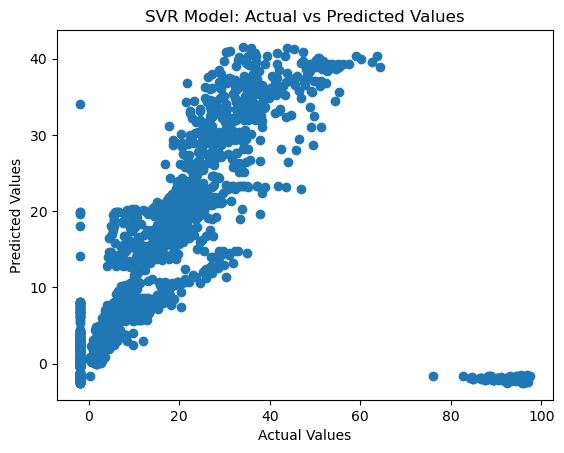

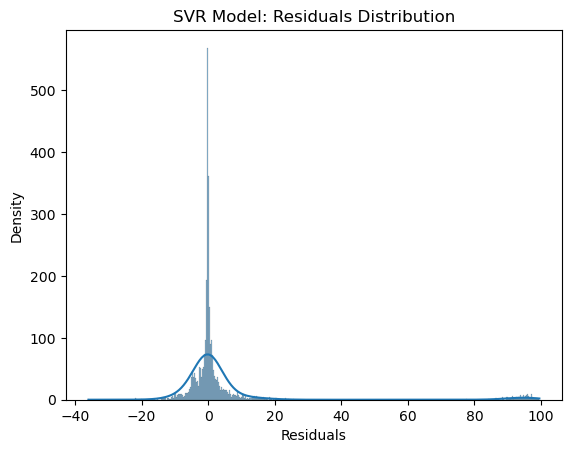

In [15]:

# Create a scatterplot of predicted values vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model: Actual vs Predicted Values')
plt.show()


residuals = y_test - y_pred

# Create a distribution plot of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('SVR Model: Residuals Distribution')
plt.show()

In [20]:
y_pred
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_test[]

,Year,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Break_Out_Category,Break_Out
2192,2000,1,1,1,0,0,1,3,1,0,3,12
2143,2013,1,1,1,0,0,1,3,0,0,3,7
9760,2005,1,1,1,0,0,1,3,0,0,1,6
654,2000,0,1,1,0,0,6,7,0,0,1,8
1983,2007,1,1,0,0,1,4,6,1,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...
7800,2017,0,1,1,0,0,0,0,1,0,0,5
1509,2013,1,1,1,0,1,2,1,1,0,3,7
7664,2005,1,1,1,0,0,3,5,1,0,0,4
12244,2014,1,0,1,0,1,5,4,0,0,2,13


In [22]:
y_test

2192     -2.0
2143     -2.0
9760      3.0
654       2.5
1983     38.7
         ... 
7800      8.0
1509     -2.0
7664     25.2
12244    17.1
13027     9.6
Name: Data_Value_Alt, Length: 3168, dtype: float64